# Desafío - Boosting Classifiers

__Integrantes:__ 

- Yerko Carreño
- Javier Pilasi 
- Daniel Flores
- Francisco Fernandez
- Máximo Oliva
- Rocío Ehijo
- Cristián Contreras


**Decripción**

Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones `churn`. Los atributos existentes hacen referencia a características de la cuenta de cada cliente.

- `State`: Estado de Estados Unidos
- `Account` Length: Tiempo en que la cuenta ha sido activada
- `Area` Code: código de área.
- `international` plan: Plan internacional activiado
- `voice` mail plan: Plan de mensajes de voz activado
- `number_vmail_messages`: Cantidad de mensajes de voz.
- `total_day_minutes`: Cantidad de minutos ocupados en la mañana.
- `total_day_calls`: Cantidad de llamadas realizadas en la mañana.
- `total_day_charge`: Cobros realizados en la mañana.
- `total_eve_minutes`: Cantidad de minutos ocupados en la tarde.
- `total_eve_calls`: Cantidad de llamadas realizadas en la tarde.
- `total_eve_charge`: Cobros realizados en la tarde.
- `total_night_calls`: Cantidad de llamadas realizadas en la noche.
- `tota_night_minutes`: Cantidad de minutos ocupados en la noche.
- `total_night_charge`: Cobros realizados en la noche.
- `total_intl_minutes`: Cantidad de minutos ocupados en llamadas internacionales.
- `total_intl_calls`: Cantidad de llamadas internacionales realizadas.
- `total_intl_charge`: Cobros realizados por llamadas internacionales.
- `churn`: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete `AppliedPreditiveModeling` de `R`.

## Preprocesamiento

- Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
- En base al comportamiento de los atributos, considere si es necesario implementar alguna recodificación o transformación de atributo. Algunas normas a seguir:
    - Para las variables categóricas, recodifíquelas en variables binarias.
    - Para aquellas variables numéricas que presenten alto sesgo, pueden transformarlas con su logaritmo.

In [2]:
# Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
# from sklearn.metrics import roc_curve
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
#from sklearn.metrics import make_scorer, accuracy_score, precision_score


# import factor_analyzer as factor
import missingno as msngo
import warnings

from IPython.display import display, Markdown

warnings.filterwarnings('ignore')

In [3]:
# Importa base de datos de entrenamiento y para predicción y ordena columnas por orden alfabetico

df_train = pd.read_csv("churn_train.csv", index_col=0)
df_train = df_train.reindex(sorted(df_train.columns), axis="columns")

df_pred = pd.read_csv("churn_test.csv", index_col=0)
df_pred = df_pred.reindex(sorted(df_pred.columns), axis="columns")

In [5]:
display(Markdown("#### Tipos de datos de cada columna"))

display(df_train.info())
display(df_pred.info())

display(Markdown("#### Extracto de algunos datos de la base de datos de entrenamiento"))

display(df_train.sample(5, random_state=2019))

#### Tipos de datos de cada columna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
account_length                   3333 non-null int64
area_code                        3333 non-null object
churn                            3333 non-null object
international_plan               3333 non-null object
number_customer_service_calls    3333 non-null int64
number_vmail_messages            3333 non-null int64
state                            3333 non-null object
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_day_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_intl_calls                 3333 non-null int64
total_intl_charge                3333 non-null float64
total_intl_minutes               3333 non-null float64
total_night_calls            

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 1 to 1667
Data columns (total 20 columns):
account_length                   1667 non-null int64
area_code                        1667 non-null object
churn                            1667 non-null object
international_plan               1667 non-null object
number_customer_service_calls    1667 non-null int64
number_vmail_messages            1667 non-null int64
state                            1667 non-null object
total_day_calls                  1667 non-null int64
total_day_charge                 1667 non-null float64
total_day_minutes                1667 non-null float64
total_eve_calls                  1667 non-null int64
total_eve_charge                 1667 non-null float64
total_eve_minutes                1667 non-null float64
total_intl_calls                 1667 non-null int64
total_intl_charge                1667 non-null float64
total_intl_minutes               1667 non-null float64
total_night_calls            

None

#### Extracto de algunos datos de la base de datos de entrenamiento

,account_length,area_code,churn,international_plan,number_customer_service_calls,number_vmail_messages,state,total_day_calls,total_day_charge,total_day_minutes,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan
1567,80,area_code_415,no,no,2,38,WV,69,40.22,236.6,68,16.79,197.5,10,2.57,9.5,102,9.43,209.5,yes
1542,48,area_code_415,no,no,3,36,MT,92,39.25,230.9,121,14.25,167.6,4,2.05,7.6,87,12.15,270.0,yes
2058,9,area_code_415,no,no,2,16,NY,87,15.05,88.5,108,15.20,178.8,3,3.11,11.5,96,10.29,228.7,yes
441,135,area_code_510,no,no,1,27,AR,141,46.48,273.4,99,13.09,154.0,6,3.32,12.3,112,11.06,245.8,yes
1443,102,area_code_510,yes,no,1,0,ME,116,33.27,195.7,87,17.77,209.1,3,2.24,8.3,73,9.05,201.1,no


In [6]:
# Análisis descriptivo de cada variable del dataframe


def get_graph(df, cols, sub_width=5, sub_height=5):

    var_numericas = list(
        df_train.select_dtypes(include=["float64", "int64"]).columns
    )
    var_numericas.sort()

    rows = np.ceil(len(var_numericas) / cols)

    plt.figure(figsize=(cols * sub_width, rows * sub_height))

    for index, col_name in enumerate(var_numericas):
        plt.subplot(rows, cols, index + 1)
        g = sns.distplot(df[col_name], color="green")
        plt.axvline(np.mean(df[col_name]), color='tomato')
        plt.title(col_name, fontsize=16)
        plt.xlabel('')
        plt.ylabel('')
        for item in g.get_xticklabels():
            item.set_rotation(30)
        plt.tight_layout()

    var_categoricas = list(
        df_train.select_dtypes(include=["object"]).columns
    )

    var_categoricas.sort()

    rows = np.ceil(len(var_categoricas) / cols)

    plt.figure(figsize=(cols * sub_width, rows * sub_height))

    for index, col_name in enumerate(var_categoricas):
        plt.subplot(rows, cols, index + 1)
        g = sns.countplot(df[col_name], palette="Greens")
        plt.title(col_name + " count", fontsize=16)
        plt.xlabel('')
        plt.ylabel('')
        for item in g.get_xticklabels():
            item.set_rotation(45)
        plt.tight_layout()

#### Análisis descriptivo de variables numéricas y categóricas

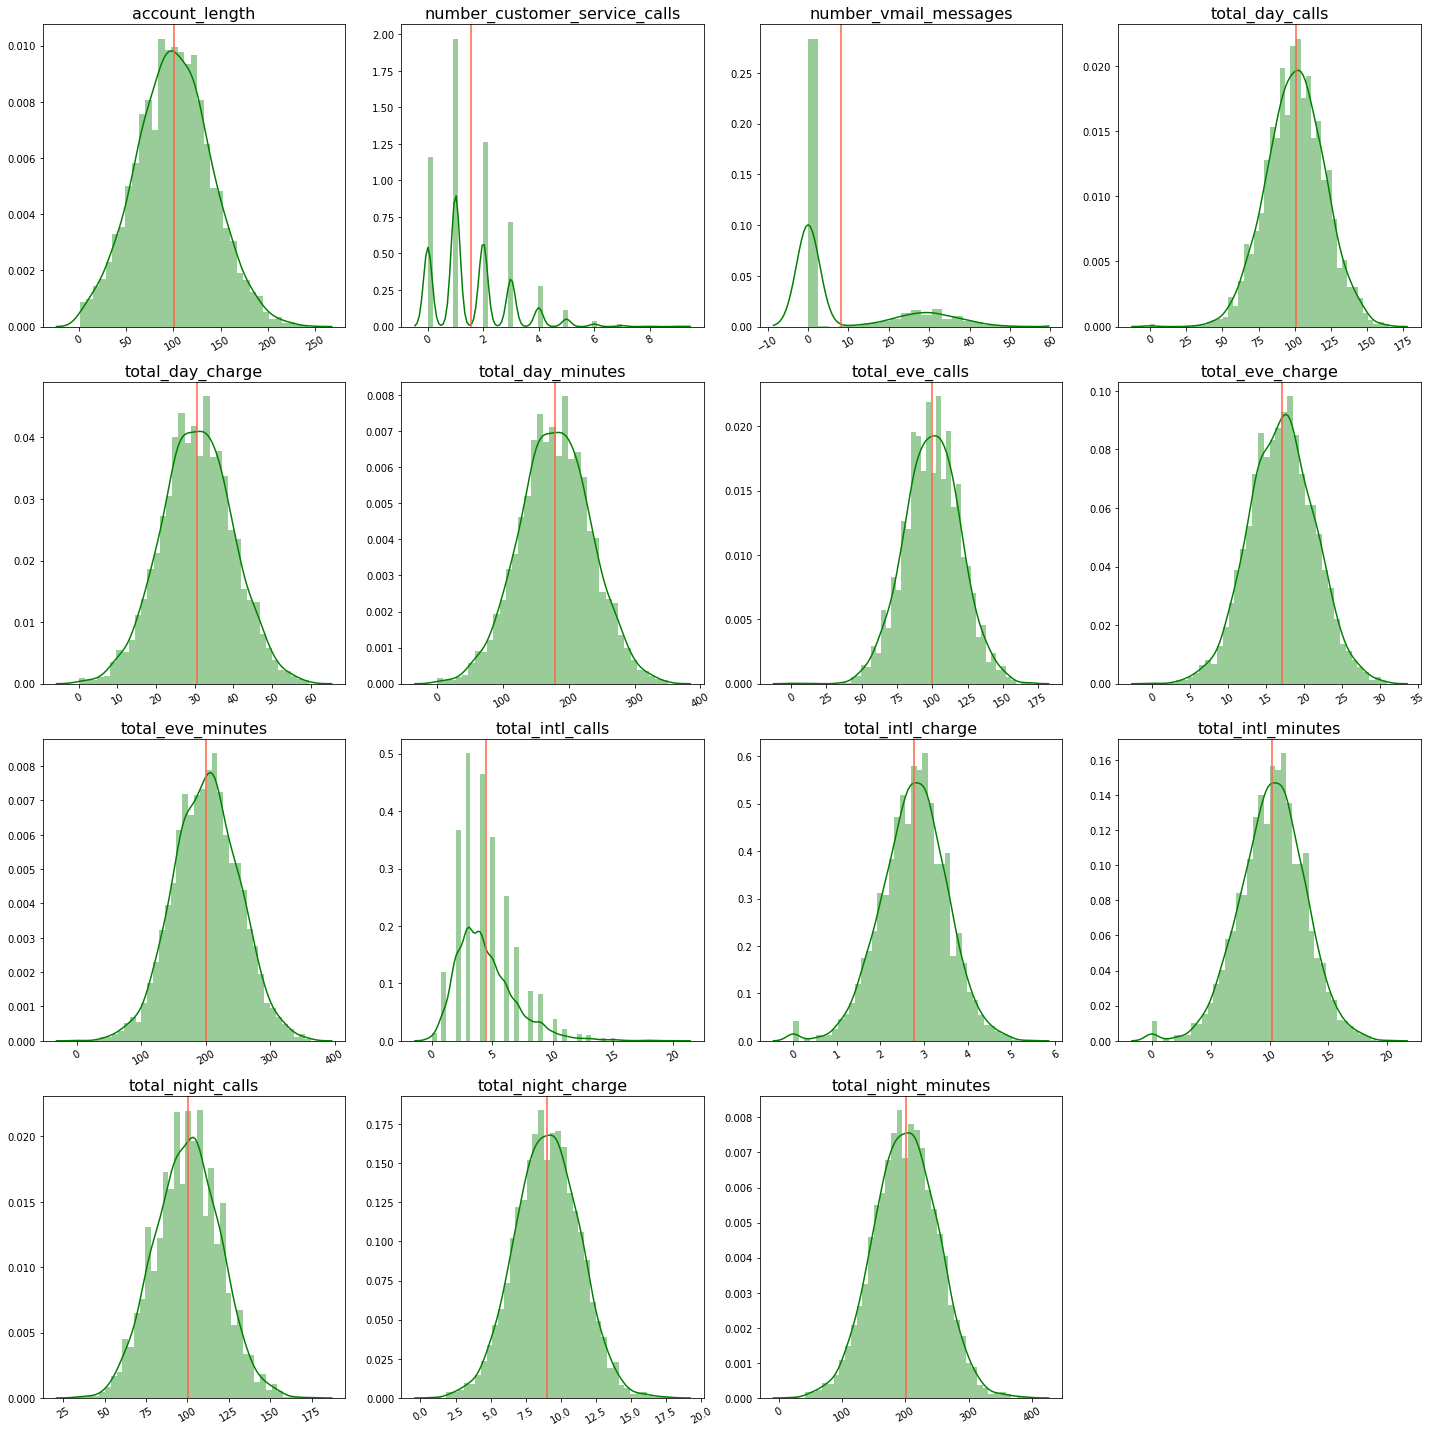

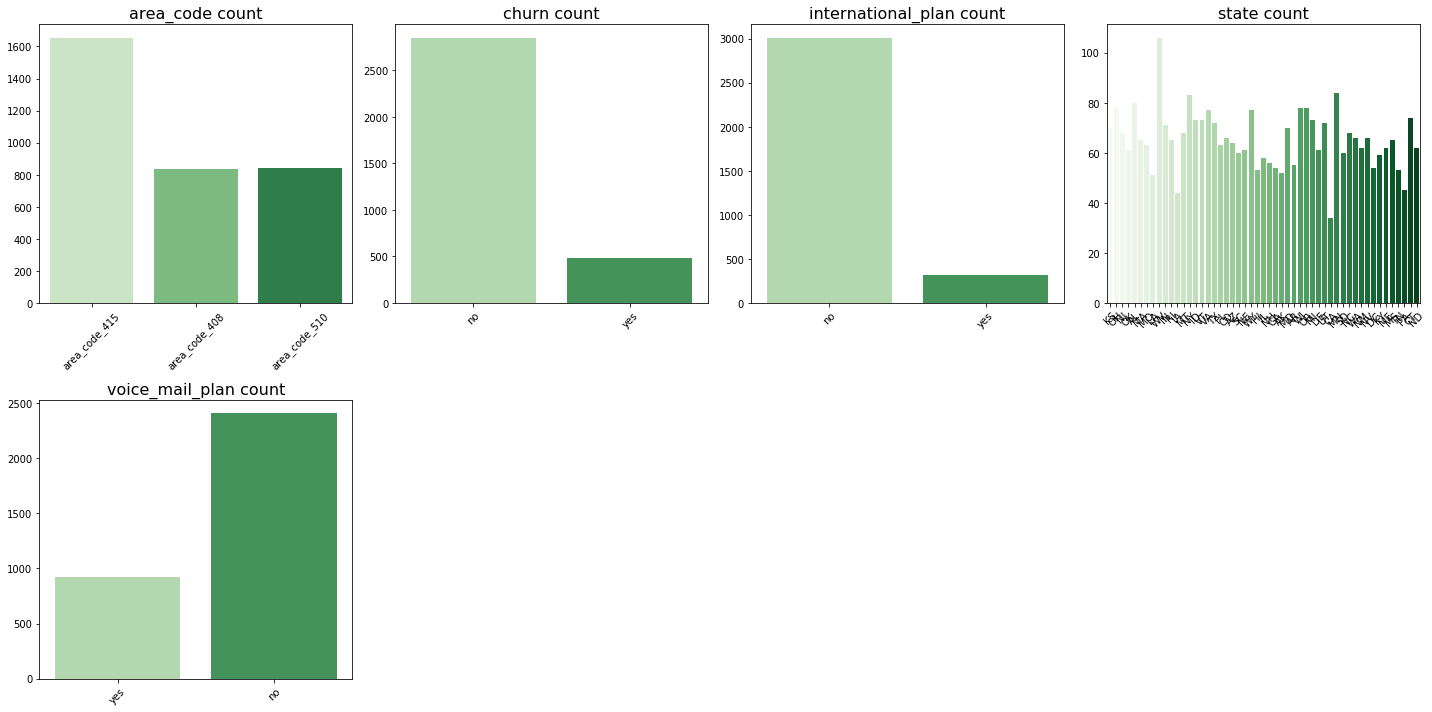

In [7]:
display(Markdown("#### Análisis descriptivo de variables numéricas y categóricas"))

get_graph(df_train, 4)

### Recodificación

A partir de los gráficos sólo se recodificarán las variables categóricas.

In [8]:
display(Markdown("#### Base de datos de entrenamiento recodificada"))

df_train_recode = df_train.copy()
df_train_recode = pd.get_dummies(df_train_recode, drop_first=True)
df_train_recode = df_train_recode.reindex(sorted(df_train_recode.columns), axis="columns")
display(df_train_recode.sample(5,random_state=2019))
display(df_train_recode.info())

display(Markdown("#### Base de datos para predicción recodificada"))

df_pred_recode = df_pred.copy()
df_pred_recode = pd.get_dummies(df_pred_recode, drop_first=True)
df_pred_recode = df_pred_recode.reindex(sorted(df_pred_recode.columns), axis="columns")
display(df_pred_recode.sample(5,random_state=2019))
display(df_pred_recode.info())

#### Base de datos de entrenamiento recodificada

,account_length,area_code_area_code_415,area_code_area_code_510,churn_yes,international_plan_yes,number_customer_service_calls,number_vmail_messages,state_AL,state_AR,state_AZ,...,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan_yes
1567,80,1,0,0,0,2,38,0,0,0,...,68,16.79,197.5,10,2.57,9.5,102,9.43,209.5,1
1542,48,1,0,0,0,3,36,0,0,0,...,121,14.25,167.6,4,2.05,7.6,87,12.15,270.0,1
2058,9,1,0,0,0,2,16,0,0,0,...,108,15.20,178.8,3,3.11,11.5,96,10.29,228.7,1
441,135,0,1,0,0,1,27,0,1,0,...,99,13.09,154.0,6,3.32,12.3,112,11.06,245.8,1
1443,102,0,1,1,0,1,0,0,0,0,...,87,17.77,209.1,3,2.24,8.3,73,9.05,201.1,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 70 columns):
account_length                   3333 non-null int64
area_code_area_code_415          3333 non-null uint8
area_code_area_code_510          3333 non-null uint8
churn_yes                        3333 non-null uint8
international_plan_yes           3333 non-null uint8
number_customer_service_calls    3333 non-null int64
number_vmail_messages            3333 non-null int64
state_AL                         3333 non-null uint8
state_AR                         3333 non-null uint8
state_AZ                         3333 non-null uint8
state_CA                         3333 non-null uint8
state_CO                         3333 non-null uint8
state_CT                         3333 non-null uint8
state_DC                         3333 non-null uint8
state_DE                         3333 non-null uint8
state_FL                         3333 non-null uint8
state_GA                         3333 non-nul

None

#### Base de datos para predicción recodificada

,account_length,area_code_area_code_415,area_code_area_code_510,churn_yes,international_plan_yes,number_customer_service_calls,number_vmail_messages,state_AL,state_AR,state_AZ,...,total_eve_calls,total_eve_charge,total_eve_minutes,total_intl_calls,total_intl_charge,total_intl_minutes,total_night_calls,total_night_charge,total_night_minutes,voice_mail_plan_yes
1280,57,0,1,0,0,3,25,0,0,0,...,112,15.91,187.2,6,2.30,8.5,122,7.14,158.6,1
1586,110,0,0,1,0,2,0,0,0,0,...,113,24.56,288.9,5,2.73,10.1,96,7.76,172.4,0
710,114,1,0,0,0,3,0,0,0,0,...,93,14.05,165.3,8,2.86,10.6,98,8.86,196.8,0
919,67,0,1,1,0,2,0,0,0,0,...,83,20.66,243.1,2,3.65,13.5,94,3.78,84.1,0
364,117,0,1,0,0,1,0,0,0,0,...,103,20.65,242.9,5,3.75,13.9,75,7.67,170.4,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 1 to 1667
Data columns (total 70 columns):
account_length                   1667 non-null int64
area_code_area_code_415          1667 non-null uint8
area_code_area_code_510          1667 non-null uint8
churn_yes                        1667 non-null uint8
international_plan_yes           1667 non-null uint8
number_customer_service_calls    1667 non-null int64
number_vmail_messages            1667 non-null int64
state_AL                         1667 non-null uint8
state_AR                         1667 non-null uint8
state_AZ                         1667 non-null uint8
state_CA                         1667 non-null uint8
state_CO                         1667 non-null uint8
state_CT                         1667 non-null uint8
state_DC                         1667 non-null uint8
state_DE                         1667 non-null uint8
state_FL                         1667 non-null uint8
state_GA                         1667 non-nul

None

## Comparación de AdaBoost y Gradient Boosting

- Entrene los clasificadores AdaBoost y Gradient Boosting para mejorar su capacidad predictiva en la medida de lo posible. Para ello, implemente una búsqueda de grilla con las siguientes especificaciones:

| Modelo                       | Grilla                                                                                                     |
|------------------------------|:----------------------------------------------------------------------------------------------------------:|
| `AdaBoostClassifier`         | `{'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]}`                           |
| `GradientBoostingClassifier` | `{'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}` |

- Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
- Reporte las métricas para los mejores modelos.

### Metrica seleccionada 

Se selecciona la métrica recall, debido a que se requiere capturar la mayor cantidad de clientes que se podrían cambiar de compañía.

### División de entrenamiento y test

In [9]:
var_objective = 'churn_yes'
var_attributes = [x for x in df_train_recode.columns if x != var_objective]

X_train, X_test, y_train, y_test = train_test_split(
    df_train_recode[var_attributes],
    df_train_recode[var_objective],
    random_state=11238,
    test_size=.33
)

### GridSearch para AdaBoostClassifier y GradientBoostClassifier

In [10]:
clf = AdaBoostClassifier()

parameters = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000]
}

acc_scorer = make_scorer(precision_score)

grid_obj_AB = GridSearchCV(clf, parameters,
                        n_jobs=-1,
                        cv=5,
                        verbose=5,
                        scoring="recall"
                        )

grid_obj_AB = grid_obj_AB.fit(X_train, y_train)

display(Markdown("#### Configuración de GridSearch para AdaBoostClassifier"))
display(grid_obj_AB)

display(Markdown("#### Mejores parámetros para AdaBoostClassifier"))
display(grid_obj_AB.best_params_)

display(Markdown("#### Mejor score del GridSearch para AdaBoostClassifier"))
display(grid_obj_AB.best_score_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.0min finished


#### Configuración de GridSearch para AdaBoostClassifier

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=5)

#### Mejores parámetros para AdaBoostClassifier

{'learning_rate': 0.5, 'n_estimators': 1000}

#### Mejor score del GridSearch para AdaBoostClassifier

0.4082133383857522

In [11]:
clf = GradientBoostingClassifier()

parameters = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 500, 1000, 2000],
    'subsample': [0.1, 0.5, 0.9]
}

acc_scorer = make_scorer(precision_score)

grid_obj_GB = GridSearchCV(clf, parameters,
                        n_jobs=-1,
                        cv=5,
                        verbose=5,
                        scoring="recall"
                        )

grid_obj_GB = grid_obj_GB.fit(X_train, y_train)

display(Markdown("#### Configuración de GridSearch para GradientBoostingClassifier"))
display(grid_obj_GB)

display(Markdown("#### Mejores parámetros para GradientBoostingClassifier"))
display(grid_obj_GB.best_params_)

display(Markdown("#### Mejor score del GridSearch para GradientBoostingClasiffier"))
display(grid_obj_GB.best_score_)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:  3.2min finished


#### Configuración de GridSearch para GradientBoostingClassifier

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

#### Mejores parámetros para GradientBoostingClassifier

{'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.9}

#### Mejor score del GridSearch para GradientBoostingClasiffier

0.7570482319404733

### Métricas del mejor modelo de AdaBoost y GradientBoost

In [12]:
y_hat_AB = grid_obj_AB.best_estimator_.predict(X_test)
y_hat_GB = grid_obj_GB.best_estimator_.predict(X_test)

display(Markdown("**Clasification report para la muestra de validación de AdaBoostClasiffier**"))
display(pd.DataFrame(classification_report(y_test, y_hat_AB, output_dict=True)))

display(Markdown("**Clasification report para la muestra de validación de GradientBoostClasiffier**"))
display(pd.DataFrame(classification_report(y_test, y_hat_GB, output_dict=True)))

**Clasification report para la muestra de validación de AdaBoostClasiffier**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.930426,0.510949,0.878182,0.720687,0.868648
precision,0.906883,0.625000,0.878182,0.765941,0.865369
recall,0.955224,0.432099,0.878182,0.693661,0.878182
support,938.000000,162.000000,0.878182,1100.000000,1100.000000


**Clasification report para la muestra de validación de GradientBoostClasiffier**

,0,1,accuracy,macro avg,weighted avg
f1-score,0.969953,0.811881,0.948182,0.890917,0.946673
precision,0.959333,0.872340,0.948182,0.915837,0.946521
recall,0.980810,0.759259,0.948182,0.870035,0.948182
support,938.000000,162.000000,0.948182,1100.000000,1100.000000


## Principales factores asociados

- Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.
- tip: Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

### Importancia relativa de atributos para el mejor modelo

El mejor modelo a partir de las métricas de recall para el valor 1 resultó ser para el modelo implementado GradientBoostClassiffier con un recall de un 75% y con una presición del 87%.

Esto significa que el modelo tendrá una alta precisión (87%) en la predicción de un cliente que se quiera cambiar de compañía, y además logrará capturar a un alto porcentaje de los cambios.

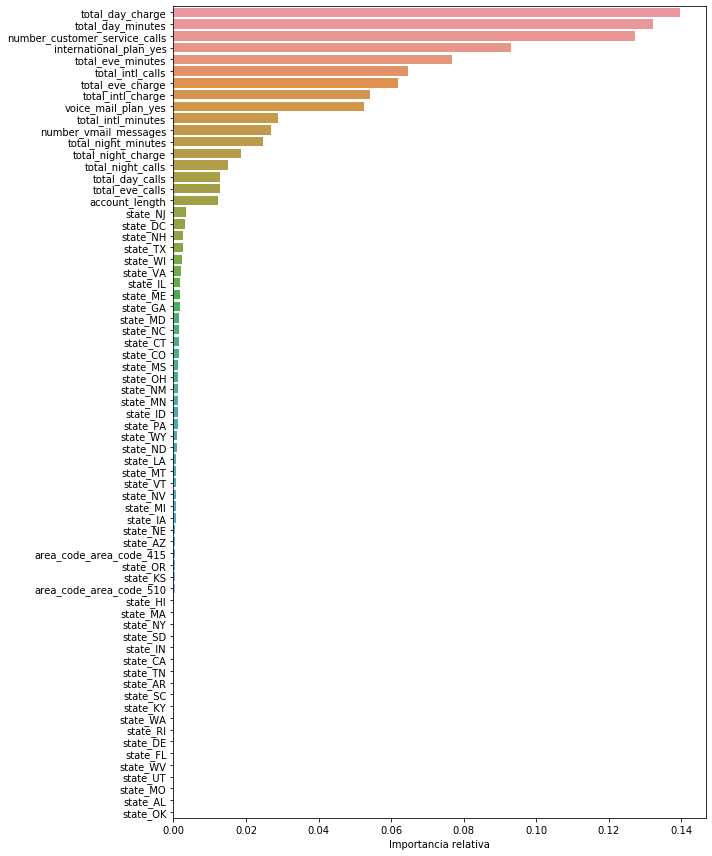

In [13]:
attr = pd.DataFrame(
    data=grid_obj_GB.best_estimator_.feature_importances_,
    index=X_train.columns,
    columns=["Importancia relativa"]
)

plt.figure(figsize=(10, 12))
attr.sort_values(by=["Importancia relativa"], ascending=False, inplace=True)

sns.barplot(x="Importancia relativa", y=attr.index, data=attr)
plt.tight_layout()

## Probabilidad de fuga
- El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
- Implemente el modelo predictivo con el archivo churn_test.csv .
- Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

### Predicción usando etiquetas

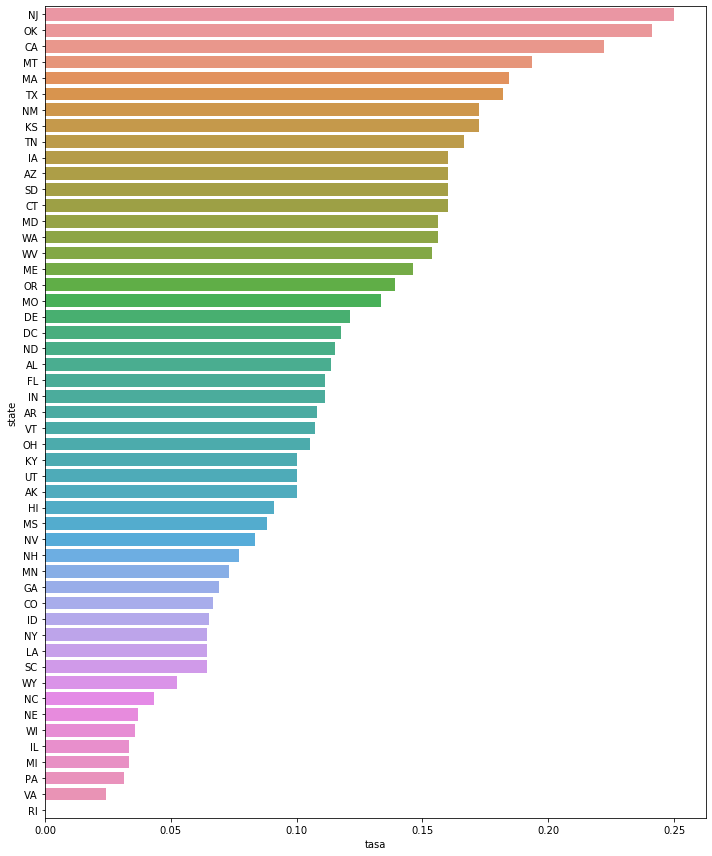

In [53]:
# Realiza predicción

y_pred1 = grid_obj_GB.best_estimator_.predict(
    df_pred_recode[var_attributes]
)

# Almacena predicción en un dataframe y lo concatena con datos originales

y_pred1 = pd.DataFrame(
    data=y_pred1,
    index=df_pred_recode.index,
    columns=["churn_pred"]
)

df_pred1 = pd.concat([df_pred, y_pred1], axis="columns")
df_pred1 = df_pred1.loc[:,["state","churn_pred"]]

# Obtiene cantidad de observaciones por estado en base de datos para predicción

obs_state = df_pred1["state"].value_counts()
obs_state = pd.DataFrame(obs_state)
obs_state.columns = ["count"]

# Obtiene total de clientes que abandonarán la compañía por estado para la predicción

churn_state_pred1 = df_pred1.groupby(["state"]).sum()
churn_state_pred1 = pd.DataFrame(churn_state_pred1)
churn_state_pred1.columns = ["suma_churn_1"]

# Calcula tasa de cambio por estado y muestra mayores tasas en grafico

churn_state_pred1["tasa"] = churn_state_pred1["suma_churn_1"] / obs_state["count"]
churn_state_pred1.sort_values(by=["tasa"], ascending=False, inplace=True)

plt.figure(figsize=(10, 12))
sns.barplot(x="tasa", y=churn_state_pred1.index, data=churn_state_pred1)
plt.tight_layout()

Los estados con mayor tasa de cambio de clientes son "NJ", "OK" y "CA".

### Predicción usando probabilidad

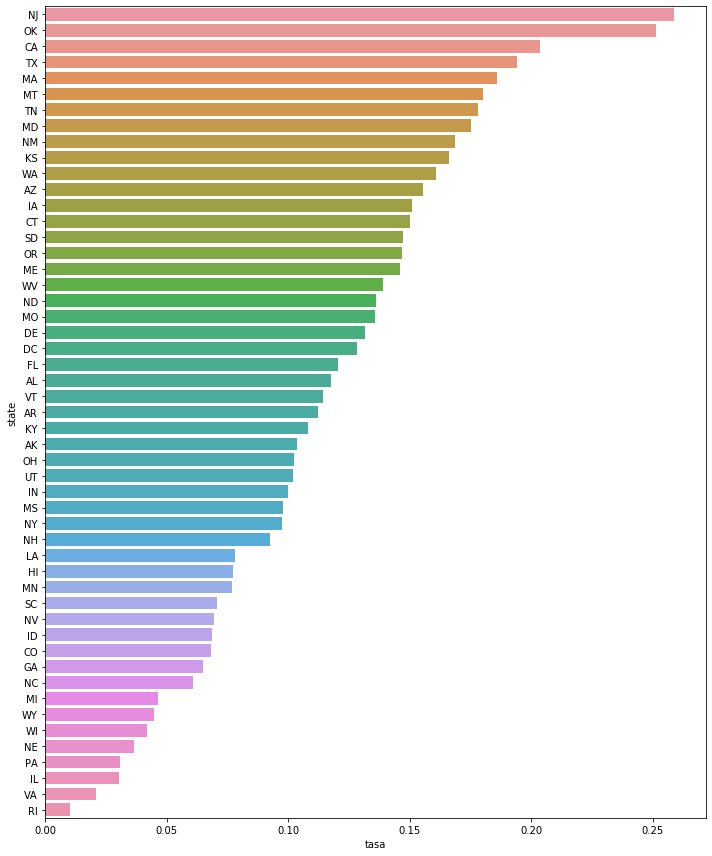

In [61]:
# Realiza predicción

y_pred2 = grid_obj_GB.best_estimator_.predict_proba(
    df_pred_recode[var_attributes]
)

# Almacena predicción en un dataframe y lo concatena con datos originales

y_pred2 = pd.DataFrame(
    data=y_pred2,
    index=df_pred_recode.index,
    columns=["churn_pred_0", "churn_pred_1"]
)

df_pred2 = pd.concat([df_pred, y_pred2], axis="columns")
df_pred2 = df_pred2.loc[:,["state","churn_pred_1"]]

churn_state_pred2 = df_pred2.groupby(["state"]).mean()
churn_state_pred2.columns=["tasa"]
churn_state_pred2.sort_values(by=["tasa"], ascending=False, inplace=True)

plt.figure(figsize=(10, 12))
sns.barplot(x="tasa", y=churn_state_pred2.index, data=churn_state_pred2)
plt.tight_layout()

Los estados con mayor tasa de cambio de clientes son "NJ", "OK" y "CA".